# Milyen állat ez?
Találkoztál nap közben egy nagyon furcsa állattal, és lefotóztad.

Kíváncsi vagy milyen állat is volt ez pontosan. Szerencsére könnyen eléred a pytorchos, imageneten előtanított ResNet50-t, (torchvision.models  resnet50, (weights="IMAGENET1K_V1")) úgyhogy megnézed, mit mond ez a képre.

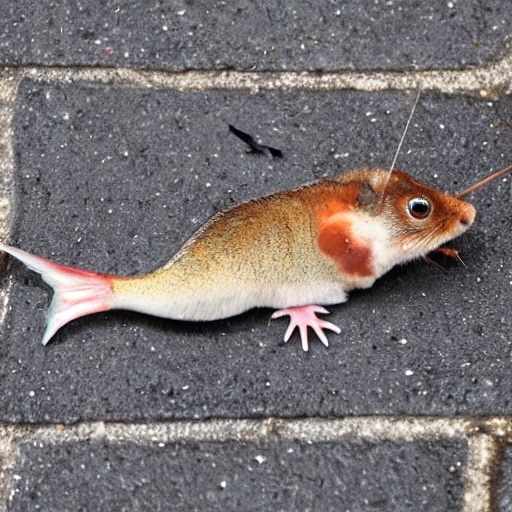

1.) Mit ábrázol a modell szerint a kép?

2.) A kép mely része alapján? (kép jobb felső negyede, kép bal felső negyede, kép jobb alsó negyede, kép bal alsó negyede, kép közepe)

In [1]:
!pip install torchray


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.2/376.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 29.1 MB/s eta 0:00:00
  Created wheel for torchray: filename=torchray-1.0.0.2-py3-none-any.whl size=444010 sha256=8d871be60377b5bbfd6cea780152a7bef4d551b3b16be94d29bbe361f13f2ebf
  Stored in directory: /root/.cache/pip/wheels/67/89/6f/9f783db1b9c9c2f31323a990f12e156e4f99d9ae15c9a2e96c
Successfully built torchray


In [2]:
import torch
from torchvision.models import resnet50
from torchvision.transforms import transforms
from PIL import Image

# Feladat 2. reszehez
from torchray.attribution.grad_cam import grad_cam
import matplotlib.pyplot as plt
from torchray.benchmark import plot_example



In [3]:

from torchvision.models import resnet50, ResNet50_Weights

# Using pretrained weights
weights=ResNet50_Weights.IMAGENET1K_V1
model = resnet50(weights=weights)
model.eval()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 123MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
image = !gdown 1KKe3Tw5miMUbpZQoVMzZsP2zoezmIi_-



In [10]:
image = Image.open('weird_image.jpg')

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

with torch.no_grad():
    output = model(input_batch)


probabilities = torch.nn.functional.softmax(output[0], dim=0)
class_idx = torch.argmax(probabilities).item()

print(f"Predicted class index: {class_idx}")
print(f"Predicted class probability: {probabilities[class_idx]:.2%}")


width, height = image.size
crop_width, crop_height = width // 2, height // 2

top_left = image.crop((0, 0, crop_width, crop_height))
top_right = image.crop((crop_width, 0, width, crop_height))
bottom_left = image.crop((0, crop_height, crop_width, height))
bottom_right = image.crop((crop_width, crop_height, width, height))


preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def run_inference(model_res, img):
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)

    with torch.no_grad():
        output = model_res(input_batch)

    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    class_idx = torch.argmax(probabilities).item()

    return class_idx, probabilities[class_idx]


results = {}
for name, img in zip(['top_left', 'top_right', 'bottom_left', 'bottom_right'],
                     [top_left, top_right, bottom_left, bottom_right]):
    class_idx, probability = run_inference(model, img)
    results[name] = {'class_index': class_idx, 'probability': probability}

for name, result in results.items():
    print(f"{name}: Predicted class index - {result['class_index']}, Probability - {result['probability']:.2%}")

Predicted class index: 38
Predicted class probability: 15.37%
top_left: Predicted class index - 225, Probability - 13.17%
top_right: Predicted class index - 359, Probability - 44.51%
bottom_left: Predicted class index - 0, Probability - 6.57%
bottom_right: Predicted class index - 38, Probability - 58.91%
